In [ ]:
# Imports

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from numpy.lib.function_base import corrcoef
import math

# Leer CSV

In [ ]:
pokemon_df = pd.read_csv("pokemon_data.csv")

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


# Quitar Megaevoluciones y calcular puntuación total

In [ ]:
pokemon_df.drop(pokemon_df[pokemon_df['Name'].str.contains('Mega')].index, inplace=True)

pokemon_df['Total'] = pokemon_df.iloc[:,4:9].sum(axis=1)

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,273
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,345
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,445
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,244
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True,505
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,550
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,530
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,600


# Separar legendarios y no legendarios


In [ ]:
grouped = pokemon_df.groupby(pokemon_df.Legendary)

legendary_df  = grouped.get_group(True)
non_legendary_df  = grouped.get_group(False)

# Legendarios

In [ ]:
legendary_df.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,495
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,480
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,490
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,550
262,243,Raikou,Electric,NaN,90,85,75,115,100,115,2,True,465


# Porcentaje de pokemon legendarios de cada tipo

In [ ]:
tab = pd.crosstab(index=legendary_df['Type 1'], columns='count')

porcentajes = (tab/tab.sum())*100

porcentajes

col_0,count
Type 1,
Dark,3.389831
Dragon,15.254237
Electric,6.779661
Fairy,1.694915
Fire,8.474576
Flying,3.389831
Ghost,3.389831
Grass,5.084746
Ground,6.779661


# Ploteamos en grafico de sectores

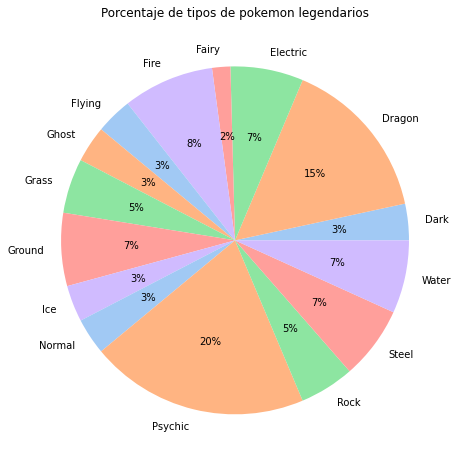

In [ ]:
#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
legendary_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,481.355932,93.237288,113.118644,99.627119,117.864407,104.847458,98.254237,3.864407,528.694915
std,167.747631,21.786851,27.968014,29.270968,28.806404,29.562799,22.936639,1.395283,57.782665
min,144.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,420.000000
25%,382.000000,80.000000,92.500000,87.500000,100.000000,90.000000,90.000000,3.000000,480.000000
50%,485.000000,91.000000,110.000000,95.000000,120.000000,100.000000,95.000000,4.000000,510.000000
75%,642.000000,102.500000,129.500000,117.500000,133.000000,120.000000,109.000000,5.000000,580.500000
max,721.000000,150.000000,180.000000,200.000000,180.000000,200.000000,180.000000,6.000000,680.000000


# Box plot total

<AxesSubplot:>

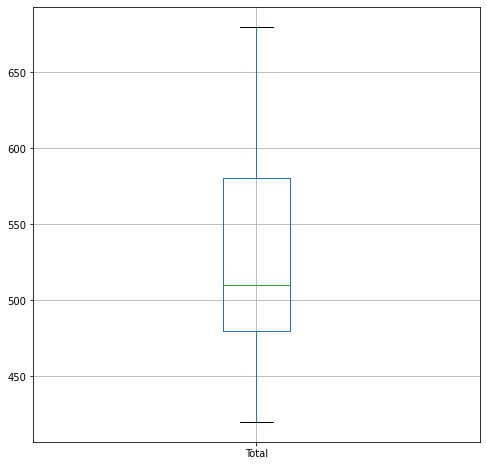

In [ ]:
plt.figure(figsize=(8,8))

legendary_df.boxplot('Total')

<AxesSubplot:>

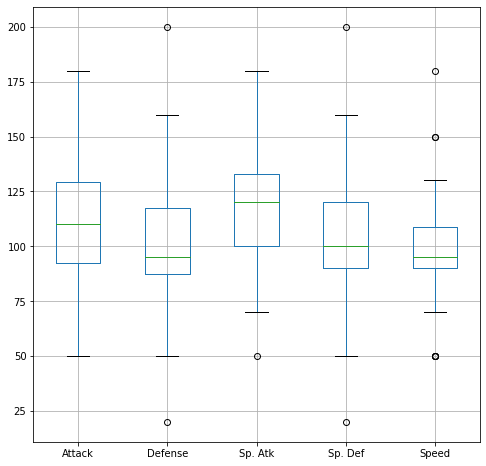

In [ ]:
plt.figure(figsize=(8,8))
legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])

# Scatter plot legendarios


array([[1.        , 0.49505373],
       [0.49505373, 1.        ]])

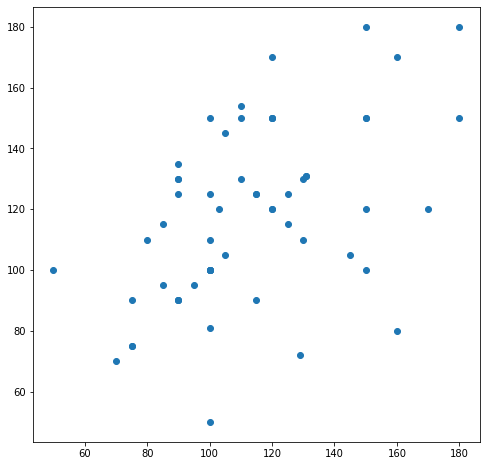

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(legendary_df["Attack"],legendary_df["Sp. Atk"])
corrcoef(legendary_df["Attack"],legendary_df["Sp. Atk"])

array([[1.        , 0.38182772],
       [0.38182772, 1.        ]])

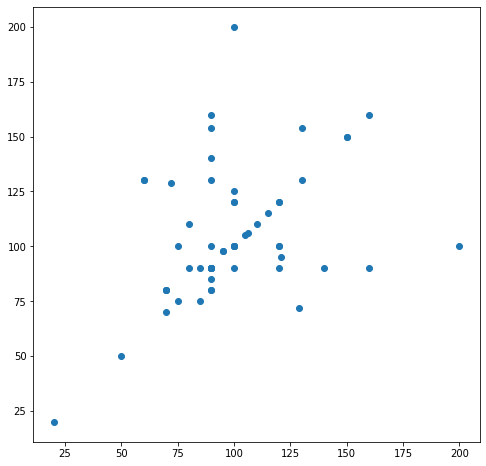

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(legendary_df["Defense"],legendary_df["Sp. Def"])
corrcoef(legendary_df["Defense"],legendary_df["Sp. Def"])

# Top 5

In [ ]:
top_legendaries = legendary_df.sort_values('Total', ascending=False).head(5)

top_legendaries

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,680
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,680
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,605
712,646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,605
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,600


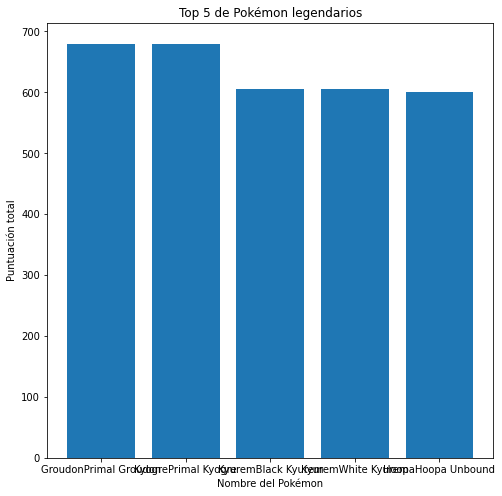

In [ ]:
plt.figure(figsize=(8,8))

plt.bar(top_legendaries['Name'], top_legendaries['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon legendarios')
plt.show()

# No legendarios

# Sacar porcentaje de tipo

In [ ]:
tab = pd.crosstab(index=non_legendary_df['Type 1'], columns='count')

porcentajes = (tab/tab.sum())*100

porcentajes

col_0,count
Type 1,
Bug,9.393064
Dark,3.757225
Dragon,2.456647
Electric,5.491329
Fairy,2.312139
Fighting,3.612717
Fire,6.213873
Flying,0.289017
Ghost,4.046243


<Figure size 576x576 with 0 Axes>

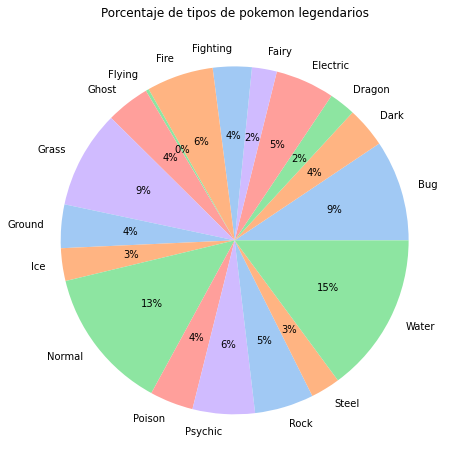

In [ ]:
plt.figure(figsize=(8,8))

#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

# Box and Whiskers de Ataques y Defensa

<AxesSubplot:>

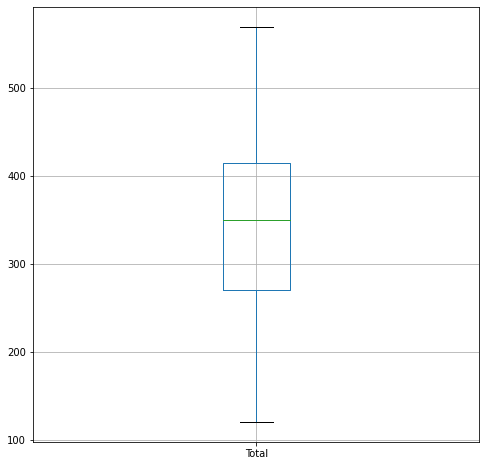

In [ ]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot('Total')

<AxesSubplot:>

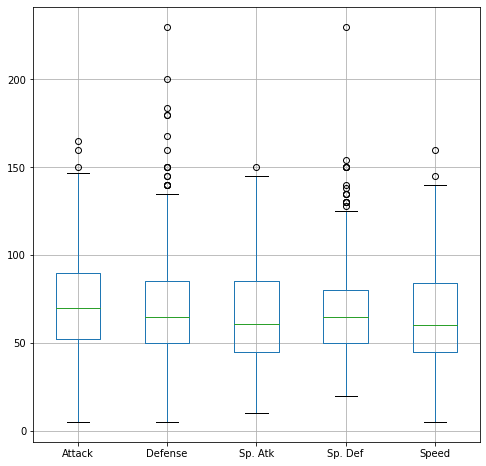

In [ ]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])

# Scatter plot

array([[1.        , 0.23280414],
       [0.23280414, 1.        ]])

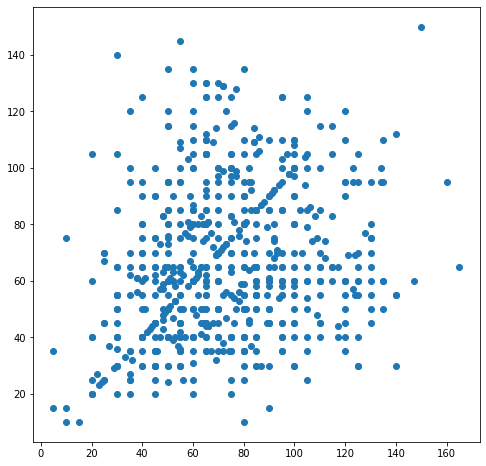

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])
corrcoef(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])

array([[1.        , 0.45072588],
       [0.45072588, 1.        ]])

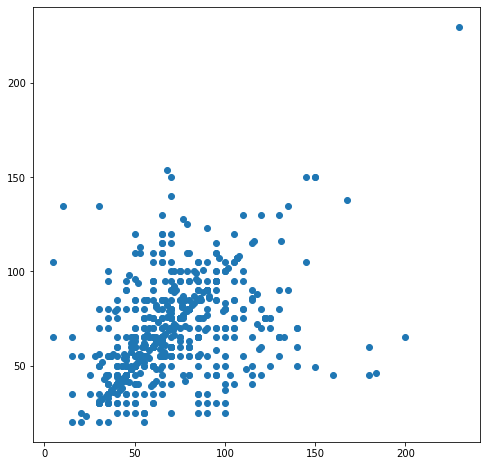

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])
corrcoef(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])

# Top 5

In [ ]:
top_non_legendaries = non_legendary_df.sort_values('Total', ascending=False).head(5)

top_non_legendaries

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,3,False,570
267,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False,539
412,376,Metagross,Steel,Psychic,80,135,130,95,90,70,3,False,530
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False,520
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False,520


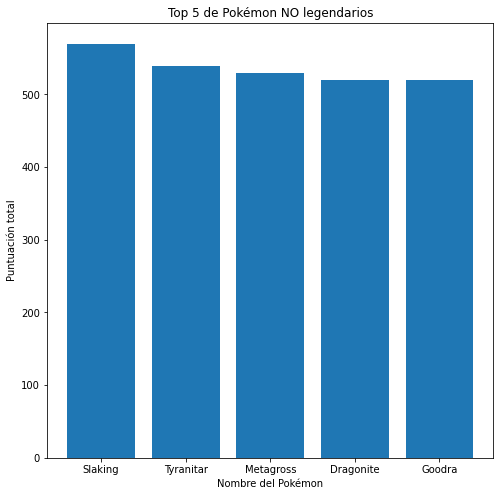

In [ ]:
plt.figure(figsize=(8,8))

plt.bar(top_non_legendaries['Name'], top_non_legendaries['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon NO legendarios')
plt.show()

# Puntuación total de legendarios y no legendarios según el tipo

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

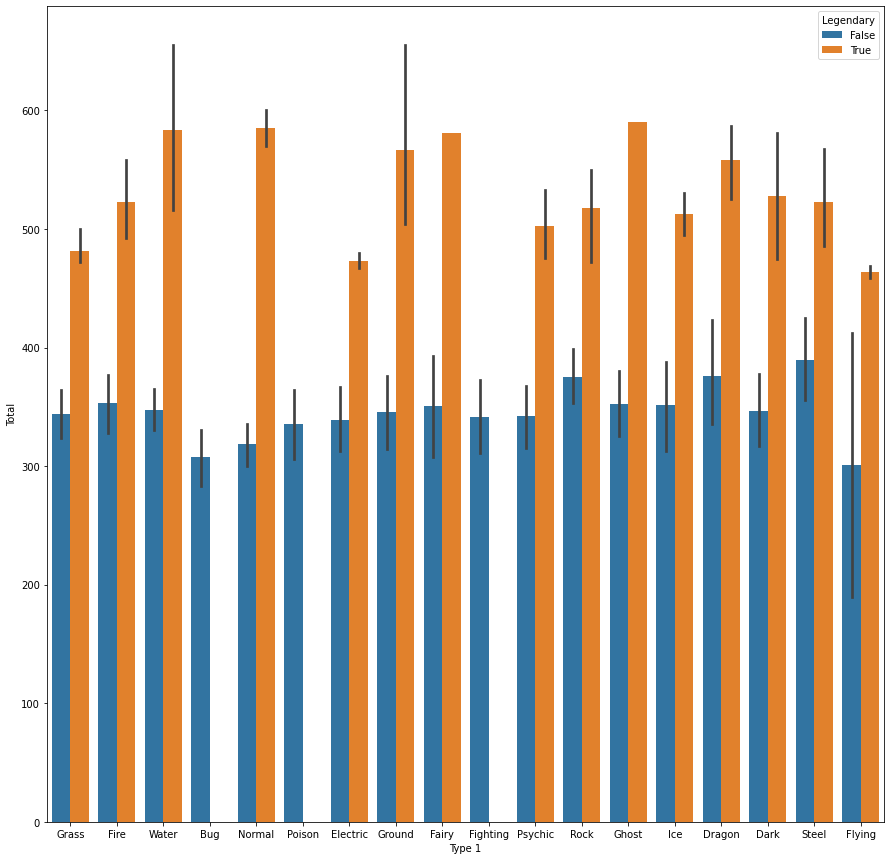

In [ ]:
plt.figure(figsize=(15,15))

sns.barplot(data=pokemon_df, x="Type 1", y="Total", hue="Legendary")

# Analisis de normalidad de los datos de Pokemon

Formas de ver normalidad:
 - Histograma (con desity)
 - Box plot
 - Describe
 - QQ Plot
 - Asimetria/Kurtosis
 - Contraste de hipotesis

# Histograma

<AxesSubplot:ylabel='Density'>

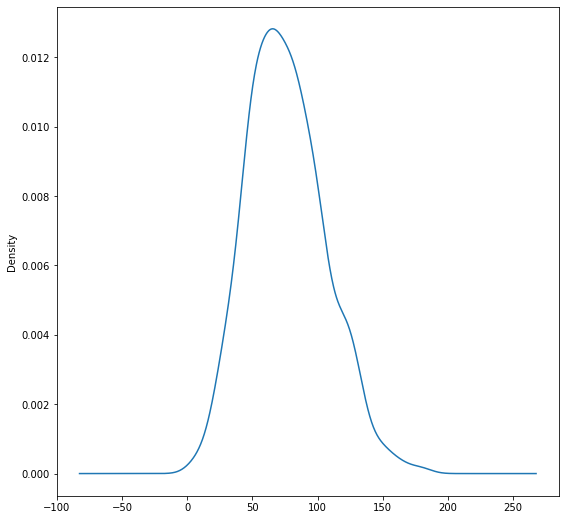

In [ ]:
pokemon_df['Attack'].plot(kind = "density", figsize = (9,9))
#pokemon_df['Defense'].plot(kind = "density", figsize = (9,9))
#pokemon_df['HP'].plot(kind = "density", figsize = (9,9))

# Box plot

<AxesSubplot:>

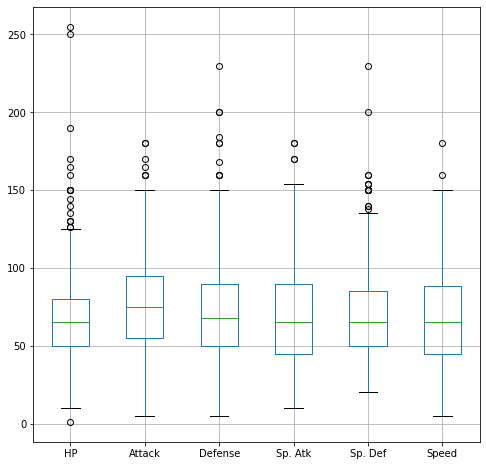

In [ ]:
plt.figure(figsize=(8,8))
pokemon_df.boxplot(column=["HP", "Attack","Defense","Sp. Atk","Sp. Def","Speed"])

# Describe

In [ ]:
pokemon_df[["HP", "Attack","Defense","Sp. Atk","Sp. Def","Speed"]].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,68.669774,75.978695,71.744341,70.213049,70.109188,66.607190
std,25.946152,29.920554,29.629870,30.263860,27.401096,27.845601
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,75.000000,68.000000,65.000000,65.000000,65.000000
75%,80.000000,95.000000,90.000000,90.000000,85.000000,88.500000
max,255.000000,180.000000,230.000000,180.000000,230.000000,180.000000


# QQ plot

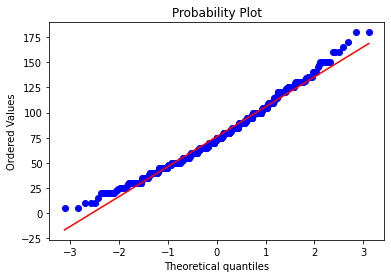

In [ ]:
scipy.stats.probplot(pokemon_df['Attack'], dist="norm", plot=plt)
plt.show()

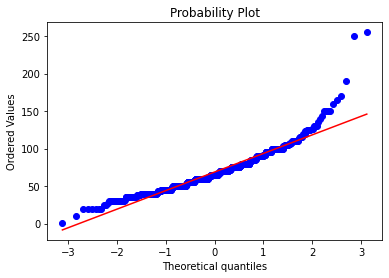

In [ ]:
scipy.stats.probplot(pokemon_df['HP'], dist="norm", plot=plt)
plt.show()

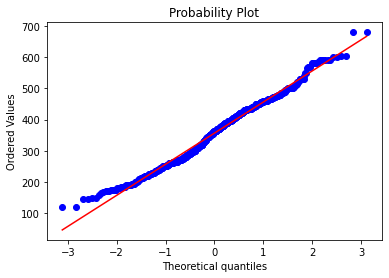

In [ ]:
scipy.stats.probplot(pokemon_df['Total'], dist="norm", plot=plt)
plt.show()

In [ ]:
scipy.stats.probplot(pokemon_df['Total'], dist="norm", plot=plt)
plt.show()

# Asimetria / Kurtosis

In [ ]:
print(pd.Series(pokemon_df['Total']).skew())
print(pd.Series(pokemon_df['Total']).kurtosis())

0.15004141545713381
-0.44635065877726765


# Estudio estadistico del ataque de los Pokemon más comunes de No Legendarios 

Estudiaremos los pokemon de tipo Normal y Agua que son los que más hay de acuerdo con el pychart del porcentaje de pokemon según el tipo.

Accedemos a los pokemon no legendarios de tipo Normal

In [ ]:
normal_df = non_legendary_df[non_legendary_df['Type 1'] == 'Normal']

normal_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
20,16,Pidgey,Normal,Flying,40,45,40,35,35,56,1,False,195
21,17,Pidgeotto,Normal,Flying,63,60,55,50,50,71,1,False,278
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False,378
24,19,Rattata,Normal,NaN,30,56,35,25,35,72,1,False,181
25,20,Raticate,Normal,NaN,55,81,60,50,70,97,1,False,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,648,MeloettaPirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,472
727,659,Bunnelby,Normal,NaN,38,36,38,32,36,57,6,False,180
728,660,Diggersby,Normal,Ground,85,56,77,50,77,78,6,False,345
729,661,Fletchling,Normal,Flying,45,50,43,40,38,62,6,False,216


Accedemos a los pokemon no legendarios de tipo Agua

In [ ]:
water_df = non_legendary_df[non_legendary_df['Type 1'] == 'Water']

water_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,271
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,347
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,452
59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False,265
60,55,Golduck,Water,NaN,80,82,78,95,80,85,1,False,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,656,Froakie,Water,NaN,41,56,40,62,44,71,6,False,243
725,657,Frogadier,Water,NaN,54,63,52,83,56,97,6,False,308
726,658,Greninja,Water,Dark,72,95,67,103,71,122,6,False,408
762,692,Clauncher,Water,NaN,50,53,62,58,63,44,6,False,286


Ahora vamos a calcular el intervalo de confianza para la media del ataque de los pokemon de tipo Normal y de tipo agua que no sean legendarios

Primero calculamos las medias de cada grupo

In [ ]:
# Media de ataque de tipo normal 
normal_atck = normal_df['Attack'].mean()
water_atck = water_df['Attack'].mean()

print(normal_atck)
print(water_atck)

70.8586956521739
70.2621359223301


Ahora vamos a ver las funciones de densidad de probablidad para el ataque de los dos tipos de Pokemon que hemos escogido

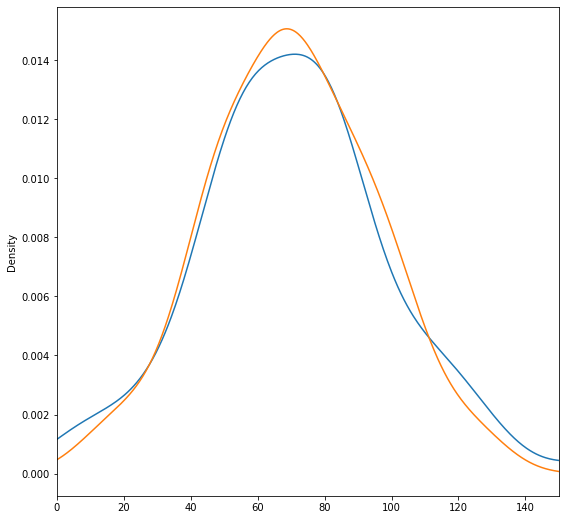

In [ ]:
normal_df['Attack'].plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(0,150));  

water_df['Attack'].plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(0,150));                         

A juzgar por la forma de la función de densidad vemos que las dos variables parecen seguir una distribución normal con media entorno a 70, como hemos calculado antes

In [ ]:
normal_std = normal_df['Attack'].std(ddof=1)
water_std = water_df['Attack'].std(ddof=1)

print(normal_std)
print(water_std)

sigma_normal = normal_std/math.sqrt(normal_df.shape[0])
sigma_water = water_std/math.sqrt(water_df.shape[0])

print(sigma_normal)
print(sigma_water)

28.12084656383577
24.623423076829905
2.93180092202356
2.426217968622681


Calculamos el intervalo de confianza para la media de los pokemon de tipo normal

In [ ]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= normal_df.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = normal_atck,                # Sample mean
                 scale = sigma_normal)             # Standard deviation estimate

<ipython-input-62-cb2bfeddc0c8>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(65.03503327971045, 76.68235802463737)

Calculamos el intervalo de confianza para los Pokemon de tipo Agua

In [ ]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= water_df.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = water_atck,                # Sample mean
                 scale = sigma_water)             # Standard deviation estimate

<ipython-input-64-6df656da7865>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(65.44974408548936, 75.07452775917085)

Viendo el intervalo de confianza obtenido y las medias calculadas podemos asegurar con una certeza del 95 % que el valor de la media de los pokemon de toda la población de no legendarios se encontrará dentro de este rango.

In [ ]:
non_legendary_df['Attack'].mean()

72.8121387283237

# T-test

## Contraste de hipotesis univariante para pokemon de tipo normal

In [ ]:
scipy.stats.ttest_1samp(a = normal_df['Attack'],               # # Sample normal type data
                 popmean = non_legendary_df['Attack'].mean())  # Pop mean

TtestResult(statistic=-0.6662945841498368, pvalue=0.5069085080276416, df=91)

Viendo el pvalor final obtenido, podemos decir que tenemos evidencia estadistica suficiente para afirmar que la media del ataque de los pokemon de tipo normal se parece a la media del ataque de los pokemon no legendarios

## Contraste de hipotesis univariante para pokemon de tipo agua

In [ ]:
scipy.stats.ttest_1samp(a = water_df['Attack'],               # Sample water type data
                 popmean = non_legendary_df['Attack'].mean())  # Pop mean

TtestResult(statistic=-1.0510196688722035, pvalue=0.29573325335376965, df=102)

Viendo el pvalor final obtenido, podemos decir que tenemos evidencia estadistica suficiente para afirmar que la media del ataque de los pokemon de tipo agua se parece a la media del ataque de los pokemon no legendarios, pero menos que la media del ataque de tipo normal

## Contraste de hipotesis Bivariante para comparar medias de no legendarios de tipo normal y agua

In [ ]:
scipy.stats.ttest_ind(a= normal_df['Attack'],
                b= water_df['Attack'],
                equal_var=False)    # Assume samples have equal variance?

# No tenenmos evidencia estadistica suficiente para decir que el grupo de Wisconssin es diferente del grupo de Minnesota al 95%

Ttest_indResult(statistic=0.1567616433604365, pvalue=0.8756063511036253)

Viendo el pvalor final obtenido, podemos decir que tenemos evidencia estadistica suficiente para afirmar que la media del ataque de los pokemon de tipo normal se parece a la media del ataque de los pokemon de tipo agua.

# Test ANOVA

- Comprobación de poblaciones normalmente distribuidas en cada grupo
- Homecedasticidad de varianzas entre grupos
- Mustras aleatorias e independientes

Comprobamos que la densidad de probabilidad por cada grupo para ver si siguen  una distribución normal

In [ ]:
# Formateamos el nombre de la columna de tipo

non_legendary_df = non_legendary_df.rename(columns={'Type 1': 'Type'})

In [ ]:
# Sacamos todos los tipos de pokemon no legendarios

types = non_legendary_df['Type'].unique()

types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Text(0, 0.5, 'Densidad de probabilidad')

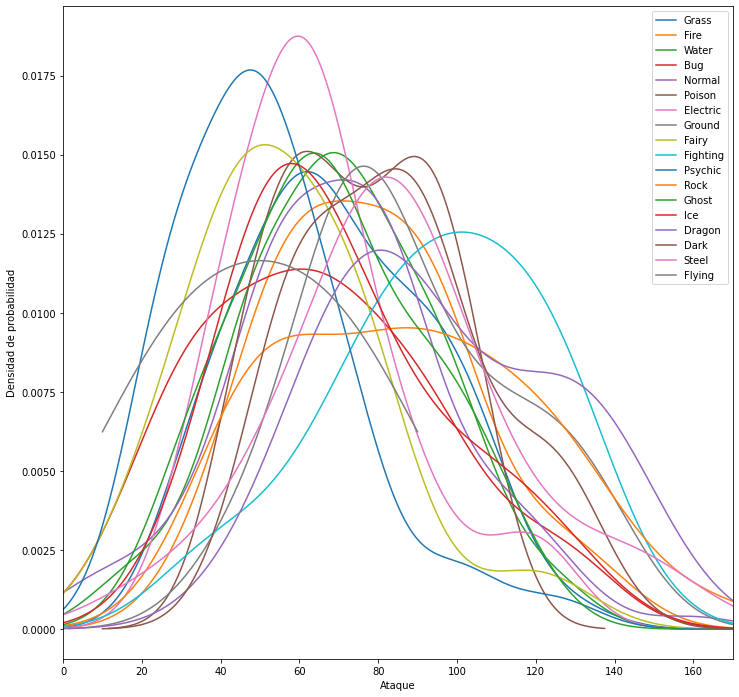

In [ ]:
# Mostramos la distribución de provbbilidad del ataque según el tipo

groups = non_legendary_df.groupby("Type").groups

for tipo in types:
  tipo = non_legendary_df['Attack'][groups[tipo]]  

  tipo.plot(kind="density",  # Plot sample mean density
                                   figsize=(12,12),
                                   xlim=(0,170));  
  
# agregar leyenda y etiquetas de eje
plt.legend(labels=types, loc='upper right')
plt.xlabel('Ataque')
plt.ylabel('Densidad de probabilidad')    




A simple vista podriamos decir que la mayoría de tipos de pokemon tienen un ataque que sigue una distribución nornal

Homocedasticidad de varianzas entre grupos

<AxesSubplot:xlabel='Type', ylabel='Attack'>

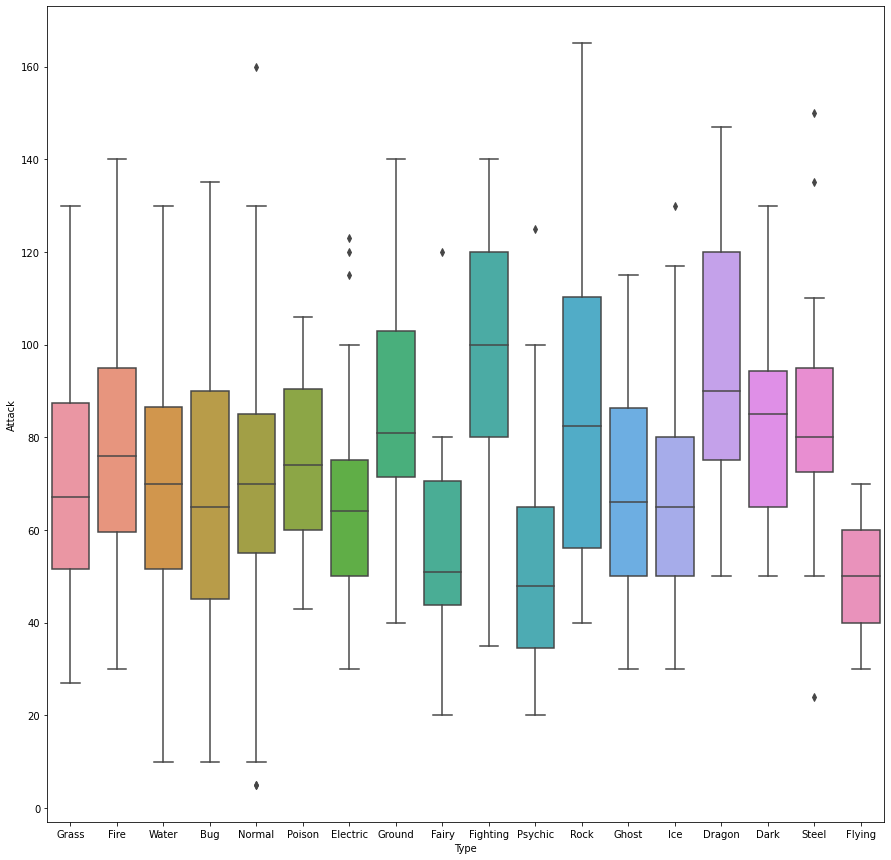

In [ ]:
# Mostramos la distribución de provbbilidad del ataque según el tipo

plt.figure(figsize=(15,15))
sns.boxplot(x="Type", y="Attack", data=non_legendary_df)

Comprobamos que la variabilidad de los datos para cada tipo de pokemon normalmente es muy parecida, salvo en algunos casos como el tipo roca o el tipo Volador presentan una variabilidad distinta a la que se observa en la mayoría de tipos

ANOVA Test

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Alternate method
model = ols('Attack ~ Type',                 # Model formula
            data = non_legendary_df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)


                 sum_sq     df         F        PR(>F)
Type       73656.166605   17.0  6.292512  7.578624e-14
Residual  464083.411429  674.0       NaN           NaN


Dado el valor de p, que es menor a 0.05, no tenemos evidencia estadistica para afirmar que la medias de ataque de cada tipo de Pokemon son parecidas. Con lo cual podemos afirmar que las media de ataque no es la misma para distintos tipos de Pokemon